In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn import preprocessing as pre
import matplotlib.pyplot as plt

from scipy import stats


In [2]:

# Importing CSV files

df_FB554 = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\CSVs\LIMS Actuals\LIMS_FB554.csv")

#df_FB554 = pd.read_csv('/workspaces/codespaces-jupyter/CSV to PRocess/LIMS_FB554.csv')

print(df_FB554.head())


              Date  Octanol PPM   Hexanol PPM   Ethanol PPM   Dodecanol PPM   \
0  5/11/2012 23:41         15.83         33.38        222.90            4.45   
1  5/12/2012 10:00         17.46         32.45        202.90            5.60   
2  5/12/2012 16:00         11.15         22.35        186.50            4.71   
3  5/12/2012 22:00          5.46          9.82         72.75            2.34   
4   5/13/2012 4:00          4.23          5.48         44.95            2.26   

   Decanol PPM   Butanol PPM  %nC8OH  %nC6OH  %nC12OH  %nC10OH   %Al2O3_bM  
0         12.26      2510.95   15.83   33.38     4.45     12.26       4.55  
1         15.27      2580.05   17.46   32.45     5.60     15.27       3.61  
2          9.24      1946.49   11.15   22.35     4.71      9.24       4.11  
3          4.01       768.78    5.46    9.82     2.34      4.01       7.50  
4          3.38       333.09    4.23    5.48     2.26      3.38       7.86  


In [3]:
df_FB554['Date'] = pd.to_datetime(df_FB554['Date'], format='%m/%d/%Y %H:%M', errors='coerce')

print(df_FB554.head())

                 Date  Octanol PPM   Hexanol PPM   Ethanol PPM   \
0 2012-05-11 23:41:00         15.83         33.38        222.90   
1 2012-05-12 10:00:00         17.46         32.45        202.90   
2 2012-05-12 16:00:00         11.15         22.35        186.50   
3 2012-05-12 22:00:00          5.46          9.82         72.75   
4 2012-05-13 04:00:00          4.23          5.48         44.95   

   Dodecanol PPM   Decanol PPM   Butanol PPM  %nC8OH  %nC6OH  %nC12OH  \
0            4.45         12.26      2510.95   15.83   33.38     4.45   
1            5.60         15.27      2580.05   17.46   32.45     5.60   
2            4.71          9.24      1946.49   11.15   22.35     4.71   
3            2.34          4.01       768.78    5.46    9.82     2.34   
4            2.26          3.38       333.09    4.23    5.48     2.26   

   %nC10OH   %Al2O3_bM  
0     12.26       4.55  
1     15.27       3.61  
2      9.24       4.11  
3      4.01       7.50  
4      3.38       7.86  


In [4]:


duplicate_counts = df_FB554.groupby(['Date']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]
print(duplicates_with_counts)

                     Date  count
38    2012-05-21 22:00:00      2
60    2012-05-27 10:00:00      2
162   2012-06-25 16:00:00      2
200   2012-07-13 16:00:00      4
312   2012-08-10 16:00:00      2
...                   ...    ...
13606 2023-04-18 21:00:00      2
13753 2023-05-25 21:00:00      2
13805 2023-06-08 03:00:00      2
13808 2023-06-08 21:00:00      2
13809 2023-06-09 03:00:00      2

[198 rows x 2 columns]


In [5]:
# Count NaNs in each row
nan_counts_per_row = df_FB554.isnull().sum(axis=1)

# Frequency distribution of NaN counts
frequency_distribution = nan_counts_per_row.value_counts().sort_index()

print(frequency_distribution)


0    14284
1        1
dtype: int64


In [6]:
# Count of rows where all values are NaN
all_nan_rows_count = df_FB554.isnull().all(axis=1).sum()

# Total number of rows in pivoted_df_FB554
total_rows = len(df_FB554)

# Percentage of rows that are completely NaN
all_nan_percentage = (all_nan_rows_count / total_rows) * 100

print(f"Number of rows with NaN for every column: {all_nan_rows_count}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows with NaN for every column: {all_nan_percentage:.2f}%")


Number of rows with NaN for every column: 0
Total number of rows: 14285
Percentage of rows with NaN for every column: 0.00%


In [7]:
# Calculate the statistics for each column in df_FB554
total_rows = len(df_FB554)
non_nan_count = df_FB554.count()
nan_count = df_FB554.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_FB554.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)


                ID  total_rows  non_nan_count  nan_count  nan_percentage
0             Date       14285          14285          0           0.000
1     Octanol PPM        14285          14285          0           0.000
2     Hexanol PPM        14285          14284          1           0.007
3     Ethanol PPM        14285          14285          0           0.000
4   Dodecanol PPM        14285          14285          0           0.000
5     Decanol PPM        14285          14285          0           0.000
6      Butanol PPM       14285          14285          0           0.000
7           %nC8OH       14285          14285          0           0.000
8           %nC6OH       14285          14285          0           0.000
9          %nC12OH       14285          14285          0           0.000
10        %nC10OH        14285          14285          0           0.000
11       %Al2O3_bM       14285          14285          0           0.000


In [8]:
# Drop rows containing NaN values
df_FB554 = df_FB554.dropna()

# Calculate the statistics for each column in df_FB554
total_rows = len(df_FB554)
non_nan_count = df_FB554.count()
nan_count = df_FB554.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_FB554.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                ID  total_rows  non_nan_count  nan_count  nan_percentage
0             Date       14284          14284          0             0.0
1     Octanol PPM        14284          14284          0             0.0
2     Hexanol PPM        14284          14284          0             0.0
3     Ethanol PPM        14284          14284          0             0.0
4   Dodecanol PPM        14284          14284          0             0.0
5     Decanol PPM        14284          14284          0             0.0
6      Butanol PPM       14284          14284          0             0.0
7           %nC8OH       14284          14284          0             0.0
8           %nC6OH       14284          14284          0             0.0
9          %nC12OH       14284          14284          0             0.0
10        %nC10OH        14284          14284          0             0.0
11       %Al2O3_bM       14284          14284          0             0.0


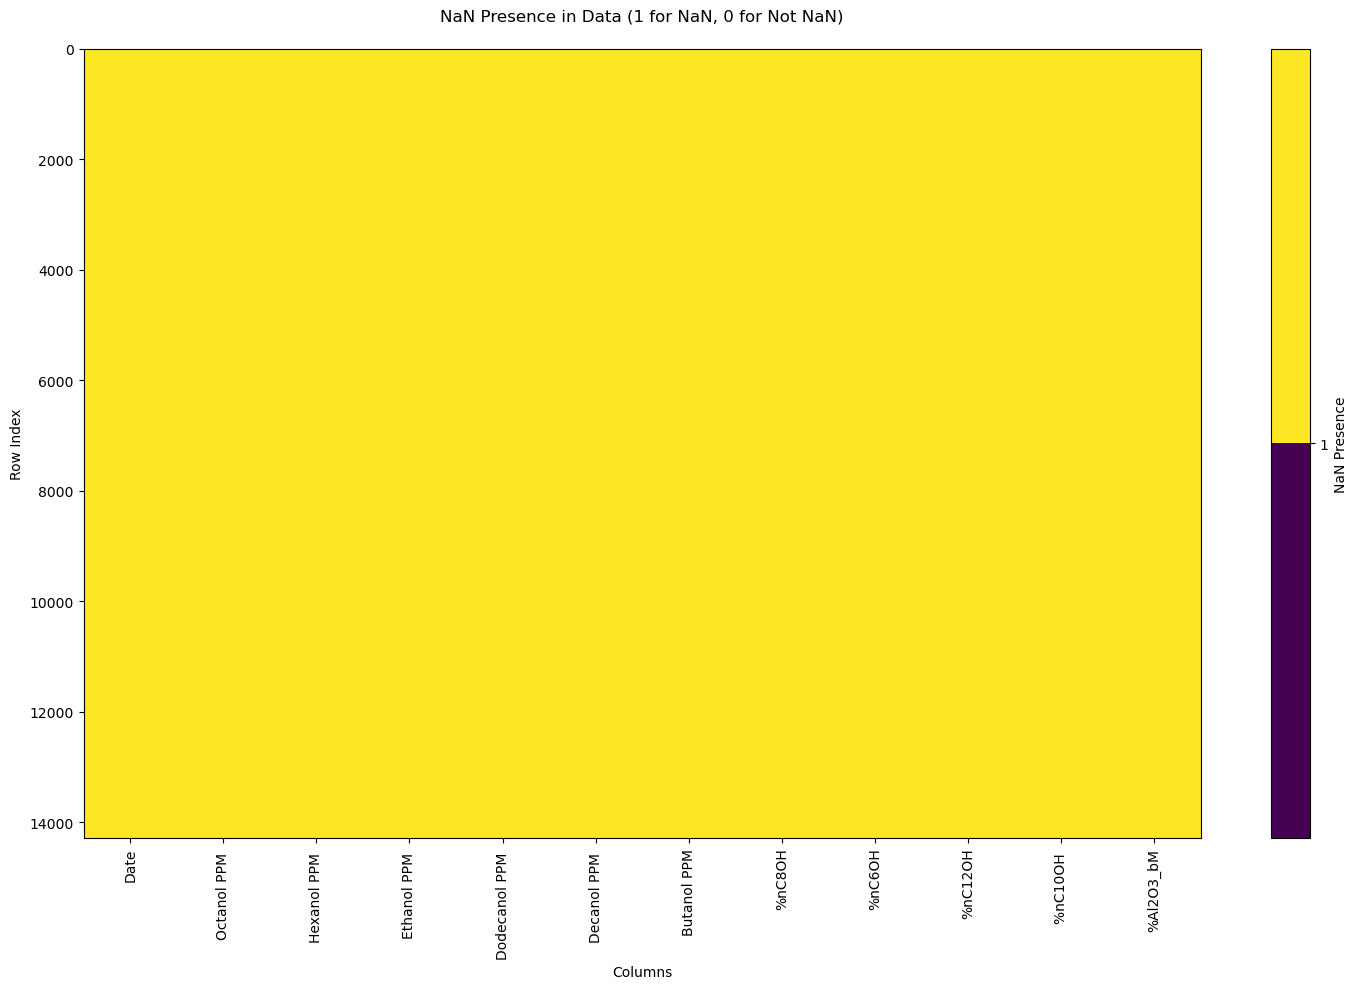

In [9]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_FB554.isna(), 0, 1)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[1, 0], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_FB554.shape[1]),df_FB554.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [10]:
# Descriptive Statistics of time intervals - Between Samples 

# Convert Date column to datetime objects
df_FB554['Date'] = pd.to_datetime(df_FB554['Date'])

# Sort by Date just to be sure
df_FB554 = df_FB554.sort_values('Date')

# Calculate the time difference between each consecutive pair of Dates
df_FB554['time_difference'] = df_FB554['Date'].diff()

# Show the time differences
print("Time Differences between each sample:")
print(df_FB554['time_difference'])

# Count the frequency of each unique time interval
interval_counts = df_FB554['time_difference'].value_counts()
print("\nFrequency of each unique time interval:")
print(interval_counts)

# Some basic statistics about the time intervals
print("\nStatistics about the time intervals:")
print(df_FB554['time_difference'].describe())


Time Differences between each sample:
0                   NaT
1       0 days 10:19:00
2       0 days 06:00:00
3       0 days 06:00:00
4       0 days 06:00:00
              ...      
14280   0 days 06:00:00
14281   0 days 06:00:00
14282   0 days 06:00:00
14283   0 days 06:00:00
14284   0 days 06:00:00
Name: time_difference, Length: 14284, dtype: timedelta64[ns]

Frequency of each unique time interval:
0 days 06:00:00    12791
0 days 12:00:00      297
0 days 00:00:00      265
0 days 04:00:00       90
0 days 08:00:00       86
                   ...  
0 days 03:48:00        1
0 days 06:53:00        1
0 days 04:54:00        1
0 days 06:46:00        1
0 days 01:28:00        1
Name: time_difference, Length: 308, dtype: int64

Statistics about the time intervals:
count                        14283
mean     0 days 06:53:08.737660155
std      1 days 03:13:19.642543245
min                0 days 00:00:00
25%                0 days 06:00:00
50%                0 days 06:00:00
75%                0 day

In [11]:
# Filter intervals greater than 6 hours and count them
greater_than_6hr_count = df_FB554[df_FB554['time_difference'] > pd.Timedelta(hours=6)].shape[0]

print(f"Number of intervals greater than 6 hours: {greater_than_6hr_count}")


Number of intervals greater than 6 hours: 761


In [12]:
# Filter rows where timestamp minute and second are not zero and count them
not_on_the_hour_count = df_FB554[(df_FB554['Date'].dt.minute != 0) | (df_FB554['Date'].dt.second != 0)].shape[0]

print(f"Number of sample times not on the hour: {not_on_the_hour_count}")


Number of sample times not on the hour: 402


In [13]:

# Create a new column 'on_the_hour' initialized to True
df_FB554['on_the_hour'] = True

# Identify rows where the time is not on the hour and set 'on_the_hour' to False
df_FB554.loc[(df_FB554['Date'].dt.minute != 0) | (df_FB554['Date'].dt.second != 0), 'on_the_hour'] = False

# Now df_FB554 has a new column 'on_the_hour' with True/False values
not_on_the_hour_count = (df_FB554['on_the_hour'] == False).sum()

print(f"Number of entries not on the hour: {not_on_the_hour_count}")



Number of entries not on the hour: 402


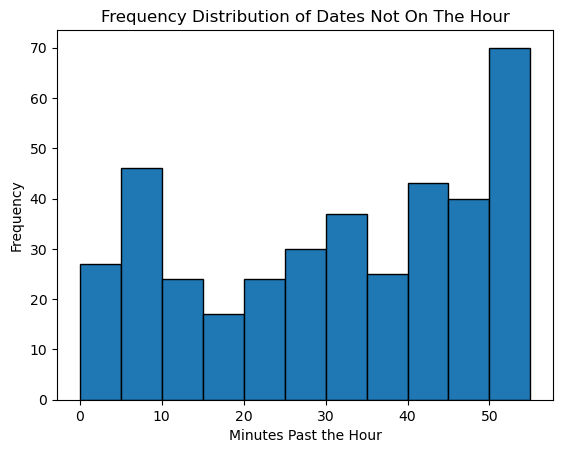

In [14]:


# Convert Date column to datetime objects
df_FB554['Date'] = pd.to_datetime(df_FB554['Date'])

# Filter rows where the Date minute and second are not zero
df_FB554_not_on_hour = df_FB554[(df_FB554['Date'].dt.minute != 0) | (df_FB554['Date'].dt.second != 0)]

# Extract just the minutes and seconds part of these filtered Dates
df_FB554_not_on_hour = df_FB554_not_on_hour.copy()
df_FB554_not_on_hour['minutes'] = df_FB554_not_on_hour['Date'].dt.minute

# Plot histogram of the minutes
plt.hist(df_FB554_not_on_hour['minutes'], bins=range(0, 60, 5), edgecolor='black')
plt.title('Frequency Distribution of Dates Not On The Hour')
plt.xlabel('Minutes Past the Hour')
plt.ylabel('Frequency')
plt.xticks(range(0, 60, 10))
plt.show()


In [15]:
df_FB554.columns


Index(['Date', 'Octanol PPM ', 'Hexanol PPM ', 'Ethanol PPM ',
       'Dodecanol PPM ', 'Decanol PPM ', 'Butanol PPM', '%nC8OH', '%nC6OH',
       '%nC12OH', '%nC10OH ', '%Al2O3_bM', 'time_difference', 'on_the_hour'],
      dtype='object')

In [16]:


# Convert Date column to datetime objects
df_FB554['Date'] = pd.to_datetime(df_FB554['Date'])

# Define a function to round Dates to the nearest hour
def round_to_hour(Date):
    if Date.minute > 30:
        return Date + pd.Timedelta(hours=1) - pd.Timedelta(minutes=Date.minute, seconds=Date.second)
    else:
        return Date - pd.Timedelta(minutes=Date.minute, seconds=Date.second)

# Apply the function to the DataFrame
df_FB554['rounded_Date'] = df_FB554['Date'].apply(round_to_hour)

# Show the updated DataFrame
print(df_FB554[['Date', 'rounded_Date', 'on_the_hour']])


                     Date        rounded_Date  on_the_hour
0     2012-05-11 23:41:00 2012-05-12 00:00:00        False
1     2012-05-12 10:00:00 2012-05-12 10:00:00         True
2     2012-05-12 16:00:00 2012-05-12 16:00:00         True
3     2012-05-12 22:00:00 2012-05-12 22:00:00         True
4     2012-05-13 04:00:00 2012-05-13 04:00:00         True
...                   ...                 ...          ...
14280 2023-07-30 21:00:00 2023-07-30 21:00:00         True
14281 2023-07-31 03:00:00 2023-07-31 03:00:00         True
14282 2023-07-31 09:00:00 2023-07-31 09:00:00         True
14283 2023-07-31 15:00:00 2023-07-31 15:00:00         True
14284 2023-07-31 21:00:00 2023-07-31 21:00:00         True

[14284 rows x 3 columns]


In [17]:
# Filter rows where timestamp minute and second are not zero and count them
not_on_the_hour_count = df_FB554[(df_FB554['rounded_Date'].dt.minute != 0) | (df_FB554['Date'].dt.second != 0)].shape[0]

print(f"Number of sample times not on the hour: {not_on_the_hour_count}")


Number of sample times not on the hour: 0


In [18]:
# Count duplicates based on 'Date'
duplicate_counts = df_FB554.groupby(['Date', 'Octanol PPM ', 'Hexanol PPM ', 'Ethanol PPM ',
       'Dodecanol PPM ', 'Decanol PPM ', 'Butanol PPM', '%nC8OH', '%nC6OH',
       '%nC12OH', '%nC10OH ', '%Al2O3_bM']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]

# Print duplicates with counts before removal
print("Duplicates with counts before removal:")
print(duplicates_with_counts)



Duplicates with counts before removal:
                     Date  Octanol PPM   Hexanol PPM   Ethanol PPM   \
38    2012-05-21 22:00:00          2.35          1.96        113.60   
163   2012-06-25 16:00:00          3.97          3.24         32.05   
203   2012-07-13 16:00:00          6.09          4.93         56.80   
315   2012-08-10 16:00:00          1.30          1.29          3.87   
327   2012-08-13 22:00:00          4.97          4.10          4.70   
...                   ...           ...           ...           ...   
13383 2022-12-27 09:00:00          0.86          0.69         15.41   
13411 2023-01-03 15:00:00          2.68          2.22         22.14   
13418 2023-01-05 09:00:00          2.13          1.67         19.82   
13608 2023-02-22 03:00:00          5.23          4.02         21.11   
13637 2023-03-01 09:00:00          5.40          3.59          4.29   

       Dodecanol PPM   Decanol PPM   Butanol PPM  %nC8OH  %nC6OH  %nC12OH  \
38               0.85          

In [19]:
# Remove duplicates based on 'Date' (keeping the first occurrence)
df_FB554 = df_FB554.drop_duplicates(subset=['Date', 'Octanol PPM ', 'Hexanol PPM ', 'Ethanol PPM ',
       'Dodecanol PPM ', 'Decanol PPM ', 'Butanol PPM', '%nC8OH', '%nC6OH',
       '%nC12OH', '%nC10OH ', '%Al2O3_bM'])

# Print the size of the DataFrame after removal to confirm duplicates were removed
print(f"Size of DataFrame after removal of duplicates: {len(df_FB554)}")

# Assert that no duplicates remain
assert not any(df_FB554.duplicated(subset=['Date', 'Octanol PPM ', 'Hexanol PPM ', 'Ethanol PPM ',
       'Dodecanol PPM ', 'Decanol PPM ', 'Butanol PPM', '%nC8OH', '%nC6OH',
       '%nC12OH', '%nC10OH ', '%Al2O3_bM']))
print("No duplicates remain!")


Size of DataFrame after removal of duplicates: 14170
No duplicates remain!


In [20]:
# Count duplicates based on 'Date'
duplicate_counts = df_FB554.groupby(['Date']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]

# Print duplicates with counts before removal
print("Duplicates with counts before removal:")
print(duplicates_with_counts)

Duplicates with counts before removal:
                     Date  count
60    2012-05-27 10:00:00      2
200   2012-07-13 16:00:00      3
325   2012-08-14 04:00:00      2
328   2012-08-14 22:00:00      2
353   2012-08-21 04:00:00      2
...                   ...    ...
13605 2023-04-18 21:00:00      2
13752 2023-05-25 21:00:00      2
13804 2023-06-08 03:00:00      2
13807 2023-06-08 21:00:00      2
13808 2023-06-09 03:00:00      2

[135 rows x 2 columns]


In [21]:
# Sort the DataFrame first by 'on_the_hour' in descending order (True before False), then by 'Date'
# This ensures that if there are duplicates, the 'True' values for 'on_the_hour' will be kept
df_FB554 = df_FB554.sort_values(by=['on_the_hour', 'Date'], ascending=[False, True])

# Now remove duplicates based on 'Date' while keeping the first occurrence (which are now the 'True' values)
df_FB554 = df_FB554.drop_duplicates(subset=['Date'])

# Print the size of the DataFrame after removal to confirm duplicates were removed
print(f"Size of DataFrame after removal of duplicates: {len(df_FB554)}")

# Assert that no duplicates remain
assert not any(df_FB554.duplicated(subset=['Date']))
print("No duplicates remain!")


Size of DataFrame after removal of duplicates: 14019
No duplicates remain!


In [22]:
# Now df_FB554 has a new column 'on_the_hour' with True/False values
not_on_the_hour_count = (df_FB554['on_the_hour'] == False).sum()

print(f"Number of entries not on the hour: {not_on_the_hour_count}")

Number of entries not on the hour: 399


In [23]:
# Count duplicates based on 'rounded_Date'
duplicate_counts = df_FB554.groupby(['rounded_Date']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]

# Print duplicates with counts before removal
print("Duplicates with counts before removal:")
print(duplicates_with_counts)


Duplicates with counts before removal:
             rounded_Date  count
8457  2018-10-29 16:00:00      2
10918 2021-01-12 03:00:00      2


In [24]:
# Remove duplicates based on 'Date' (keeping the first occurrence)
df_FB554 = df_FB554.drop_duplicates(subset=['rounded_Date'])

# Print the size of the DataFrame after removal to confirm duplicates were removed
print(f"Size of DataFrame after removal of duplicates: {len(df_FB554)}")

# Assert that no duplicates remain
assert not any(df_FB554.duplicated(subset=['rounded_Date']))
print("No duplicates remain!")


Size of DataFrame after removal of duplicates: 14017
No duplicates remain!


In [25]:
#Searching for Date column to use during further processing
## Date vs rounded_Date

# Element-wise comparison
df_FB554['Date_matches_rounded_Date'] = df_FB554['Date'] == df_FB554['rounded_Date']

# Display rows where the two columns don't match
non_matching_rows = df_FB554[df_FB554['Date_matches_rounded_Date'] == False]

# Shows data transformations
print("Rows where Date and rounded_Date don't match:")
print(non_matching_rows[['Date', 'rounded_Date']])


######### Next cell is the same without time_difference


Rows where Date and rounded_Date don't match:
                     Date        rounded_Date
0     2012-05-11 23:41:00 2012-05-12 00:00:00
419   2012-09-05 15:27:00 2012-09-05 15:00:00
1074  2013-02-12 08:30:00 2013-02-12 08:00:00
1224  2013-03-29 18:04:00 2013-03-29 18:00:00
1225  2013-03-31 10:30:00 2013-03-31 10:00:00
...                   ...                 ...
13843 2023-03-24 22:30:00 2023-03-24 22:00:00
13968 2023-05-14 11:32:00 2023-05-14 12:00:00
14031 2023-05-30 02:22:00 2023-05-30 02:00:00
14129 2023-06-23 11:42:00 2023-06-23 12:00:00
14133 2023-06-24 04:28:00 2023-06-24 04:00:00

[397 rows x 2 columns]


In [26]:
##For simplicity and to avoid confusion of variables name in following Notebook
#Swapping ['Date'] and ['rounded_Date'] column names
# Allows merging on the times converted to "on-the-hour" as ['Date']

# Swap the column headings
df_FB554.rename(columns={'Date': 'temp', 'rounded_Date': 'Date'}, inplace=True)
df_FB554.rename(columns={'temp': 'rounded_Date'}, inplace=True)

# Display the first few rows to verify the changes
print(df_FB554.head())




         rounded_Date  Octanol PPM   Hexanol PPM   Ethanol PPM   \
1 2012-05-12 10:00:00         17.46         32.45        202.90   
2 2012-05-12 16:00:00         11.15         22.35        186.50   
3 2012-05-12 22:00:00          5.46          9.82         72.75   
4 2012-05-13 04:00:00          4.23          5.48         44.95   
5 2012-05-13 10:00:00          3.15          3.14         35.58   

   Dodecanol PPM   Decanol PPM   Butanol PPM  %nC8OH  %nC6OH  %nC12OH  \
1            5.60         15.27      2580.05   17.46   32.45     5.60   
2            4.71          9.24      1946.49   11.15   22.35     4.71   
3            2.34          4.01       768.78    5.46    9.82     2.34   
4            2.26          3.38       333.09    4.23    5.48     2.26   
5            1.32          2.11        99.18    3.15    3.14     1.32   

   %nC10OH   %Al2O3_bM time_difference  on_the_hour                Date  \
1     15.27       3.61 0 days 10:19:00         True 2012-05-12 10:00:00   
2      9

In [27]:
#'rounded_Date' is the originals with offset time from "on the hour"
## So dropping it

#'Date_matches_rounded_Date' used to ensure correct date column is moved to next stage
## No longer needed, dropping it

#time_difference turned out to be informational only
## not needed going forward
## dropping it 

#Row 1 is not averaged due to avaiability of data
## Suspect minimal overal impact
### NOT dropping - NaN removed with time_dif column
##Consider reavaluating in other iterations


# Drop the 'rounded_Date', 'Date_matches_rounded_Date', 'time_difference', 'on_the_hour' columns
df_FB554.drop(columns=['rounded_Date', 'Date_matches_rounded_Date', 'time_difference', 'on_the_hour'], inplace=True)

# Reorder columns to move 'Date' to the first position
cols = ['Date'] + [col for col in df_FB554.columns if col != 'Date']
df_FB554 = df_FB554[cols]

# Display the first few rows to verify the changes
print(df_FB554.head())

                 Date  Octanol PPM   Hexanol PPM   Ethanol PPM   \
1 2012-05-12 10:00:00         17.46         32.45        202.90   
2 2012-05-12 16:00:00         11.15         22.35        186.50   
3 2012-05-12 22:00:00          5.46          9.82         72.75   
4 2012-05-13 04:00:00          4.23          5.48         44.95   
5 2012-05-13 10:00:00          3.15          3.14         35.58   

   Dodecanol PPM   Decanol PPM   Butanol PPM  %nC8OH  %nC6OH  %nC12OH  \
1            5.60         15.27      2580.05   17.46   32.45     5.60   
2            4.71          9.24      1946.49   11.15   22.35     4.71   
3            2.34          4.01       768.78    5.46    9.82     2.34   
4            2.26          3.38       333.09    4.23    5.48     2.26   
5            1.32          2.11        99.18    3.15    3.14     1.32   

   %nC10OH   %Al2O3_bM  
1     15.27       3.61  
2      9.24       4.11  
3      4.01       7.50  
4      3.38       7.86  
5      2.11      10.97  


Skipping non-numeric column: Date


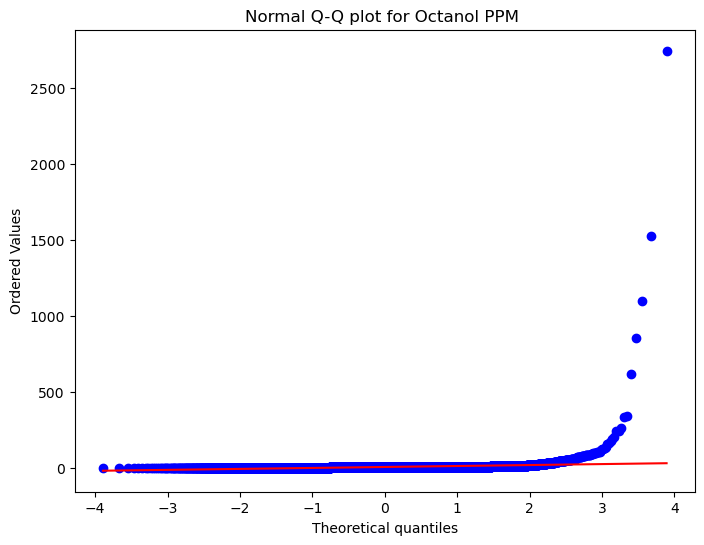

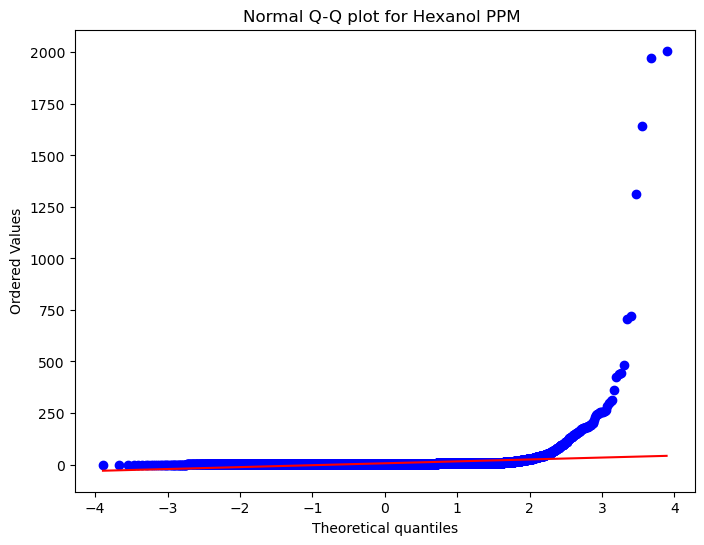

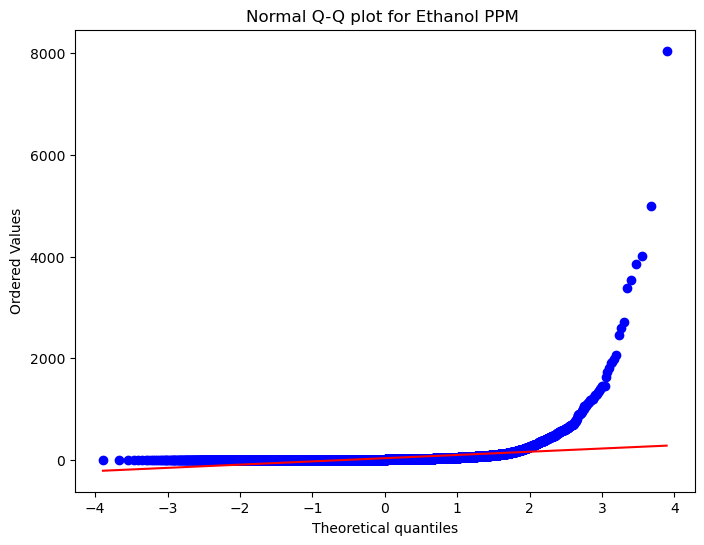

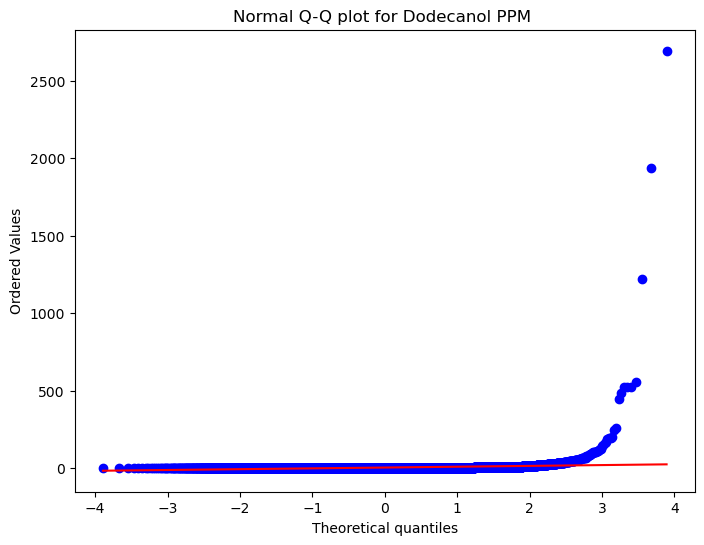

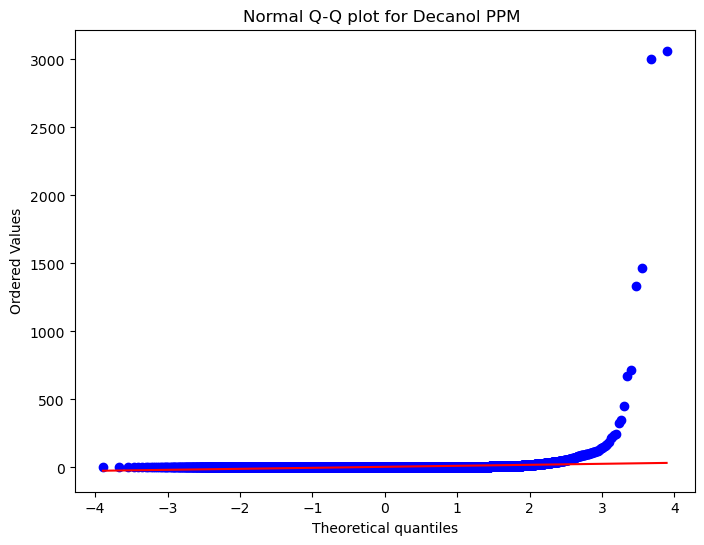

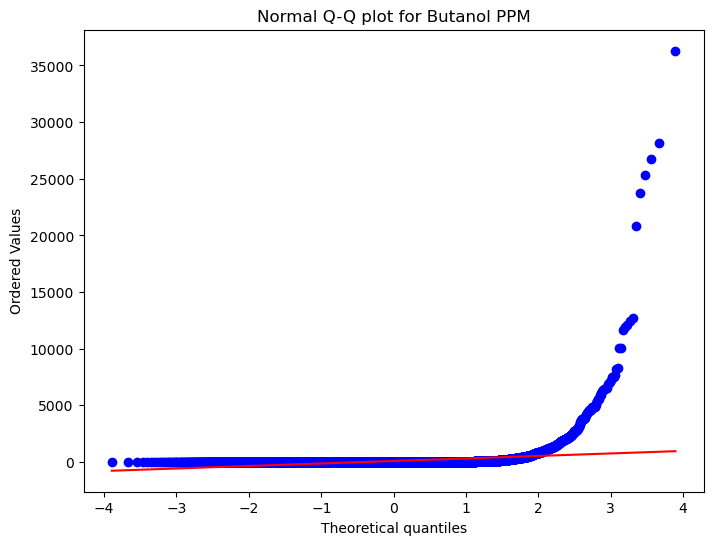

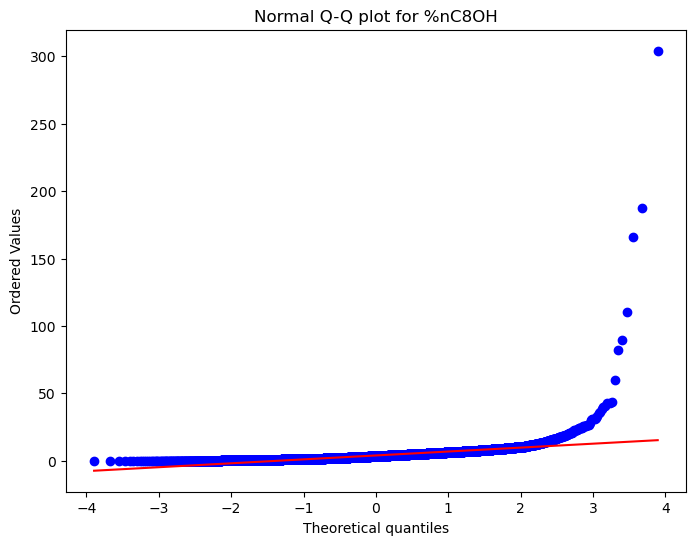

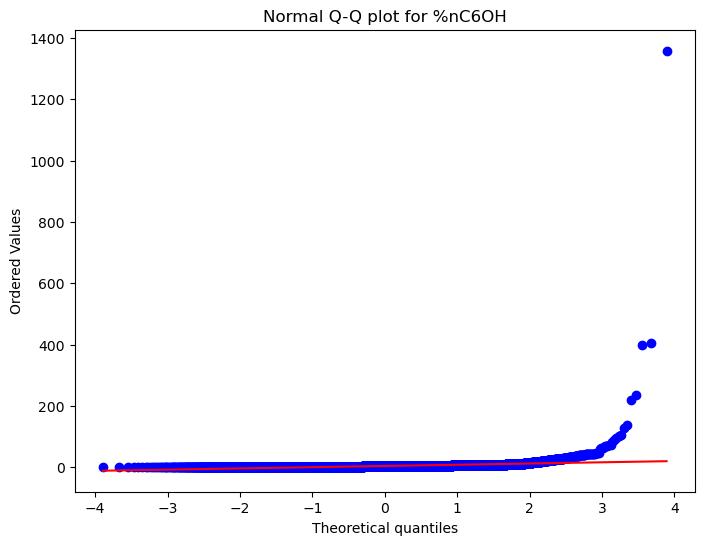

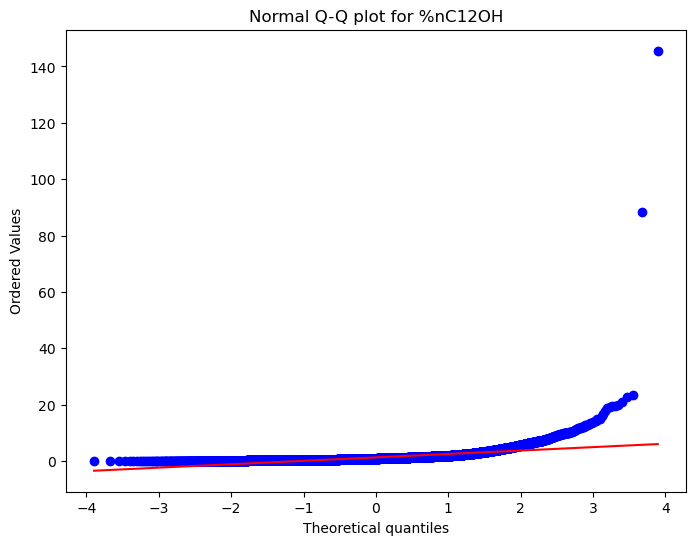

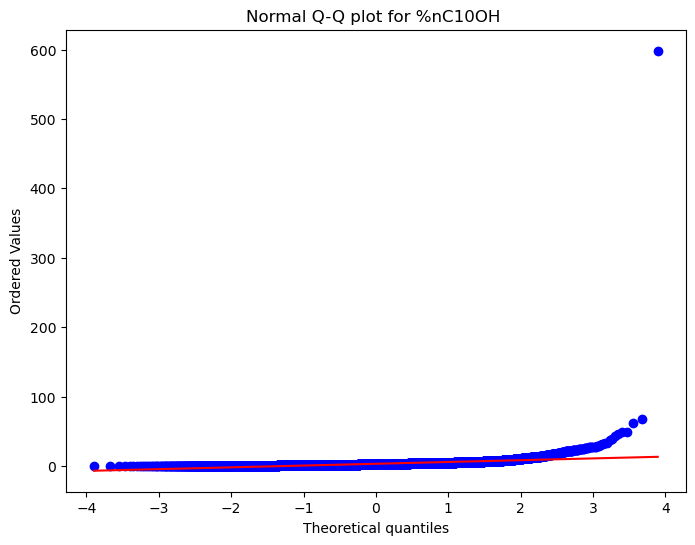

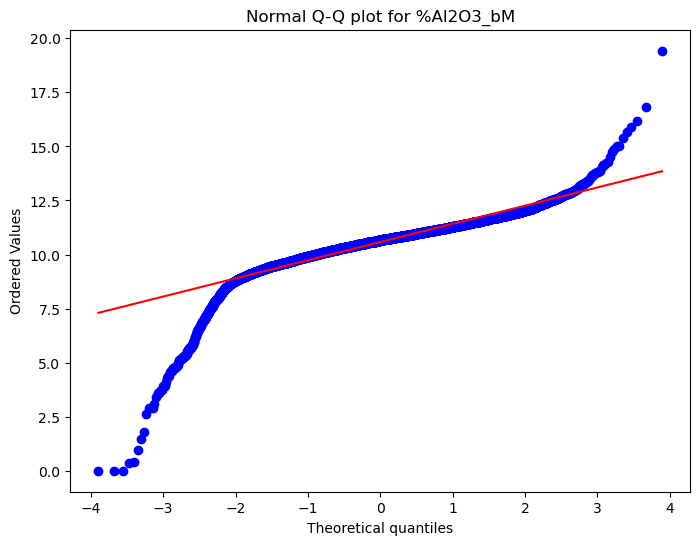

In [28]:

# Loop through each column and check for issues
for col in df_FB554.columns:
    # Check if the column is 'Date' or non-numeric
    if col == 'Date' or not pd.api.types.is_numeric_dtype(df_FB554[col]):
        print(f"Skipping non-numeric column: {col}")
        continue

    # Check for NaN values in the column
    if df_FB554[col].isnull().any():
        print(f"Column with NaN values: {col}")

    # Attempt to create a Q-Q plot
    try:
        plt.figure(figsize=(8, 6))
        stats.probplot(df_FB554[col], dist="norm", plot=plt)
        plt.title(f"Normal Q-Q plot for {col}")
        plt.show()
    except Exception as e:
        print(f"Error processing column {col}: {e}")


In [29]:

# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_FB554.to_csv('df_FB554.csv', index=False)

In [30]:
df_FB554.describe()

,Octanol PPM,Hexanol PPM,Ethanol PPM,Dodecanol PPM,Decanol PPM,Butanol PPM,%nC8OH,%nC6OH,%nC12OH,%nC10OH,%Al2O3_bM
count,14017.000000,14017.000000,14017.000000,14017.000000,14017.000000,14017.000000,14017.000000,14017.000000,14017.00000,14017.000000,14017.000000
mean,5.343145,6.048903,40.523980,2.678687,4.888581,95.371019,3.978212,3.967594,1.24981,3.120723,10.578390
std,30.781399,35.155027,145.779946,32.492896,42.022916,742.390582,4.627916,13.559662,2.05057,5.830448,0.909849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.990000,1.710000,5.670000,0.470000,1.480000,3.780000,1.800000,1.540000,0.44000,1.340000,10.180000
50%,3.670000,3.030000,14.210000,0.890000,2.670000,6.480000,3.470000,2.880000,0.83000,2.520000,10.660000
75%,5.540000,4.840000,34.070000,1.560000,4.180000,17.330000,5.310000,4.690000,1.45000,3.990000,11.081000
max,2747.000000,2008.000000,8041.000000,2694.000000,3064.000000,36301.200000,304.100000,1358.000000,145.60000,598.400000,19.427000
